The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

**Data Dictionary**

**Sl_No:** Primary key of the records
**Customer Key:** Customer identification number
**Average Credit Limit**: Average credit limit of each customer for all credit cards
**Total credit cards**: Total number of credit cards possessed by the customer
**Total visits bank: **Total number of visits that customer made (yearly) personally to the bank
**Total visits online:** Total number of visits or online logins made by the customer (yearly)
**Total calls made:** Total number of calls made by the customer to the bank or its customer service department (yearly)


In [55]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
# from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

sns.set(color_codes=True)

import warnings

warnings.filterwarnings("ignore")

from yellowbrick.cluster import InterclusterDistance #----Visual representation of the cluster

In [56]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
df=pd.read_excel('/content/drive/My Drive/CreditCardCustomerData_2.xlsx')



In [58]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [60]:
df.shape

(660, 7)

In [61]:
data=df.copy()

In [62]:

data['Customer Key'].unique()

array([87073, 38414, 17341, 40496, 47437, 58634, 48370, 37376, 82490,
       44770, 52741, 52326, 92503, 25084, 68517, 55196, 62617, 96463,
       39137, 14309, 29794, 87241, 30507, 61061, 24001, 68067, 65034,
       14854, 81130, 29112, 13999, 32550, 82164, 61517, 28254, 30888,
       46388, 74126, 52142, 37659, 83132, 20119, 52363, 50769, 68502,
       99026, 83326, 62040, 37252, 74625, 51182, 60301, 96386, 43886,
       78503, 68419, 32828, 17937, 71632, 81566, 29759, 36929, 70248,
       91673, 61355, 60403, 85868, 76205, 66524, 69214, 21976, 35149,
       27120, 18821, 33187, 93482, 90168, 71881, 59656, 12026, 99589,
       38970, 57990, 39447, 79694, 79403, 47296, 37559, 38165, 49198,
       18007, 59619, 37016, 91099, 74704, 25742, 11937, 52736, 88338,
       18916, 92501, 96213, 26599, 73007, 97935, 26089, 14946, 74795,
       73435, 41634, 84069, 83244, 87291, 18086, 33369, 15310, 98499,
       35256, 89007, 93997, 16577, 25440, 81116, 63663, 69811, 36111,
       39454, 70199,

In [63]:
df[df.duplicated('Customer Key')]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [18]:
df[df.duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [64]:
data['Customer Key'].nunique()

655

In [65]:
# dropping the serial no. column as it does not provide any information
df.drop("Sl_No", axis=1, inplace=True)

In [124]:
# dropping the Customer Key. column as it does not provide any information
df.drop("Customer Key", axis=1, inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


All are integers and no null values.!

# **EDA on Data**

In [126]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


There are 660 customers.

Average. credit limit is about 34,575 USD and Max is 200,000.
Total credit cards range from 1 to 10 with an average of 5
Total visits to bank are from 0 visit sto 5 visits with average being 2 visits
Total online visits are form 0 to 15 visits with average online visits being 2
Total calls made are between 1 and 10 with average being 3.0


# **Univariate Analysis**

In [128]:
# function to create box plot and histogram with Mean
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

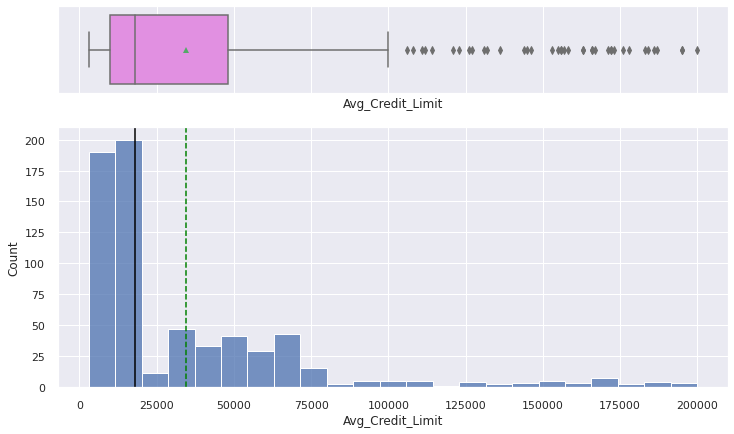

In [129]:
histogram_boxplot(data, "Avg_Credit_Limit")

There are a bunch of custemers whose income is more than 150,000. and some more than 175,000. I prefer to categorise them into a different category than treating them as outliers. Even the hihgest value is a reasonable one.


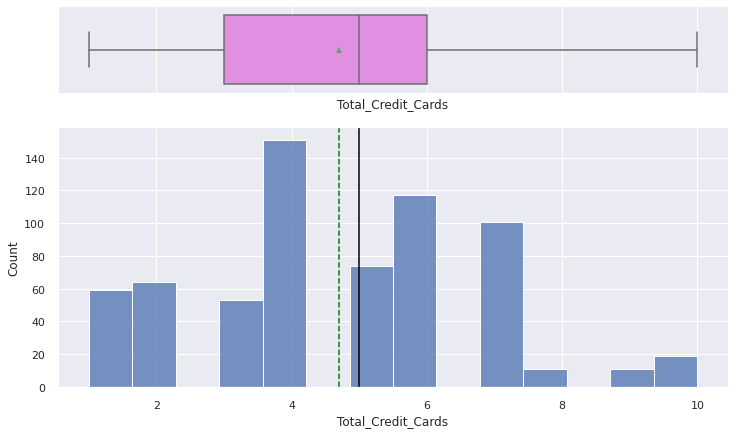

In [130]:
histogram_boxplot(data, "Total_Credit_Cards")

# **Bivariate Analysis**

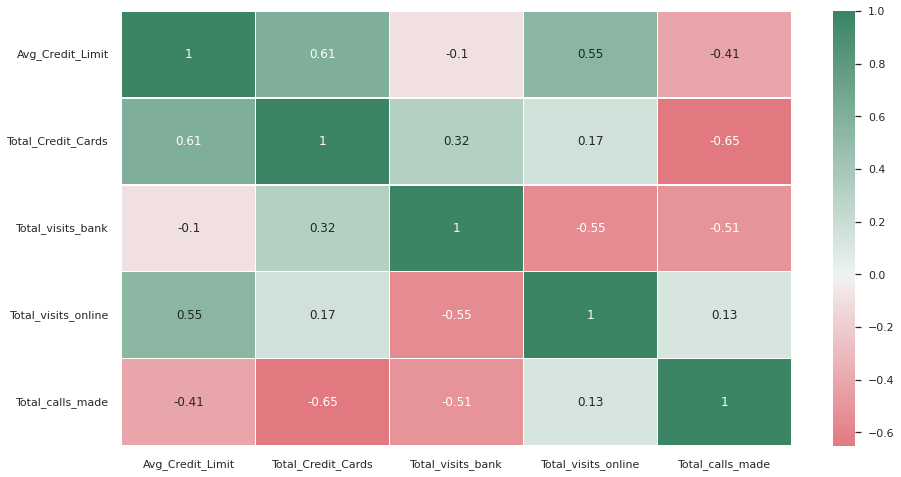

In [131]:
plt.figure(figsize=(15,8))

cmap=sns.diverging_palette(10, 150, as_cmap=True)

ax=sns.heatmap(data=df.corr(),
            annot=True,
            linewidths=.1,
            center=0,
            cbar=True,
            cmap=cmap
            )
plt.show()

There is a
 
1.   61% positive corelation between Average credit limit and Total credit cards,

2.   55% potive corelation between Average credit limit and Total visits online
3. 32% positve corelation between Total bank visits and Total credit cards
4. 65% Negative corelation netween Toal credit cards and total calls made.
5.41% NEgative corelation between Avg_credit limit and Total calls made.
6. Total_visits online and total credit cards are not correlated.


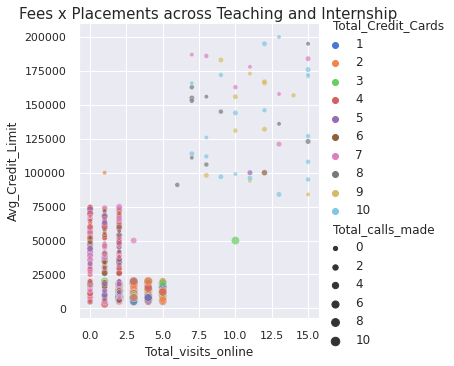

In [132]:
####g2=sns.relplot(x="Total_visits_online", y="Avg_Credit_Limit", hue="Total_Credit_Cards", size="Total_calls_made", alpha=.7, palette="muted",
#              sizes=[10, 50, 80, 310, 500], height=5, data=df);
#####g2.fig.suptitle("Total_visits_online x Avg_Credit_Limit across Total calls made and Total_Credit_Cards", y=1.01, fontsize=15); 

g2=sns.relplot(x="Total_visits_online", y="Avg_Credit_Limit", hue="Total_Credit_Cards", size="Total_calls_made", alpha=.7, palette="muted", 
                height=5, data=df);

# style="customers", 

g2.fig.suptitle("Fees x Placements across Teaching and Internship", y=1.01, fontsize=15); 

# **Focus Variables:**

1.   Based on the corelation matrix we choose to 

1. Variables without higher corelation coefficient, i.e they behve differently than most of the others. Eg. Total visits online and Total credit cards

2. Higly corelated varaiables : Randomly picking to each other.
categorise Average credit limit and Total credict cards
Eg.
*   Average credit limit
*   Total credit cards
*   Total Calls Made



In [133]:
df_groups=df.copy()

In [134]:
def map_cat_credit(val):
    
    if val <= 50000:
        return 'Low'
    
#    elif val == 50000 - 100000:
    elif val <= 100000:
        return 'Medium'
    
    else:
        return 'High'

In [135]:
def map_cat(val):
    
    if val <= 3:
        return 'Low'
    
    elif val <= 8:
        return 'Medium'
    else:
        return 'High'

In [136]:
df_groups['Avg_Credit_Limit Group']=df_groups['Avg_Credit_Limit'].apply(map_cat_credit)
df_groups['Total_Credit_Cards Group']=df_groups['Total_Credit_Cards'].apply(map_cat)
df_groups['Total_visits_online Group']=df_groups['Total_visits_online'].apply(map_cat)

In [137]:
df_groups.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit Group,Total_Credit_Cards Group,Total_visits_online Group
0,100000,2,1,1,0,Medium,Low,Low
1,50000,3,0,10,9,Low,Low,High
2,50000,7,1,3,4,Low,Medium,Low
3,30000,5,1,1,4,Low,Medium,Low
4,100000,6,0,12,3,Medium,Medium,High


In [138]:
result=df_groups.groupby(['Avg_Credit_Limit Group', 'Total_Credit_Cards Group','Total_visits_online Group']).agg('Avg_Credit_Limit').count().reset_index()

result.sort_values(by=["Avg_Credit_Limit Group", "Total_Credit_Cards Group",  "Total_visits_online Group"], inplace=True)

result['Group']=result['Avg_Credit_Limit Group'] + "-" + result['Total_Credit_Cards Group'] + "-" + result['Total_visits_online Group']

result['Per']=round(result['Avg_Credit_Limit']/(result['Avg_Credit_Limit'].sum())*100,0)

result['Per']=result['Per'].astype(int)

result

result = result[result.Per > 0]
result

,Avg_Credit_Limit Group,Total_Credit_Cards Group,Total_visits_online Group,Avg_Credit_Limit,Group,Per
0,High,High,High,18,High-High-High,3
1,High,High,Medium,4,High-High-Medium,1
2,High,Medium,High,9,High-Medium-High,1
3,High,Medium,Medium,8,High-Medium-Medium,1
5,Low,Low,Low,78,Low-Low-Low,12
6,Low,Low,Medium,96,Low-Low-Medium,15
7,Low,Medium,Low,306,Low-Medium-Low,46
8,Low,Medium,Medium,27,Low-Medium-Medium,4
9,Medium,High,High,7,Medium-High-High,1
13,Medium,Medium,Low,101,Medium-Medium-Low,15


In [139]:
#!pip install squarify

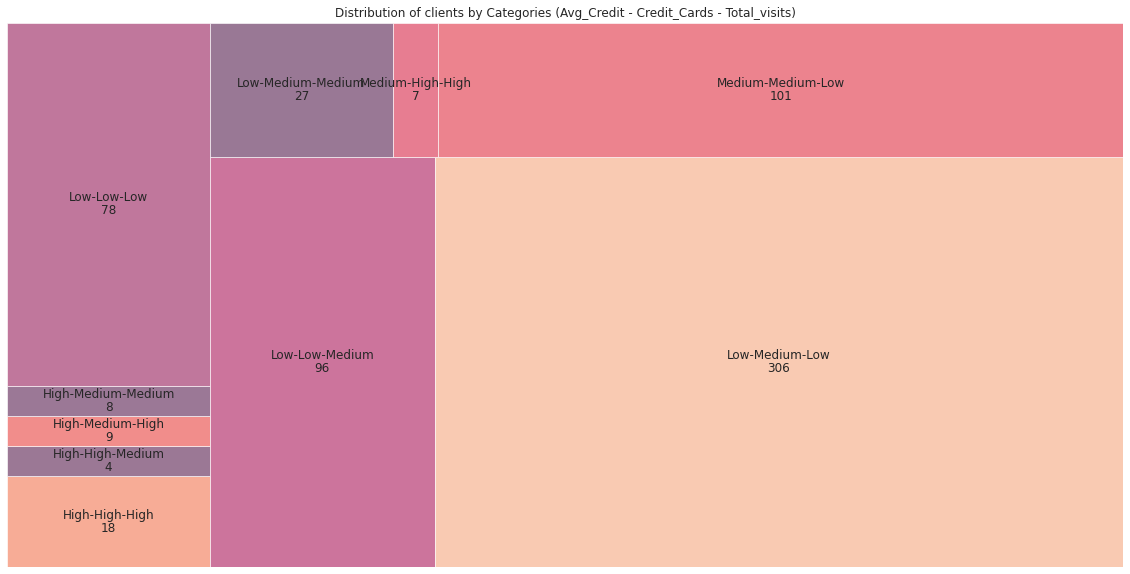

In [141]:
# !pip install squarify

import squarify 

plt.figure(figsize=(20,10))

plt.title("Distribution of clients by Categories (Avg_Credit - Credit_Cards - Total_visits)")

squarify.plot(sizes=result['Per'].astype(int), label=result['Group'], alpha=.6, value=result['Avg_Credit_Limit'])

plt.axis('off')

plt.show()

BAsed on the groupings we took 13 different buckets of customers grouped under  the 3 variables, Avg-credit limit , total visits online , Total credit cards are classifed. We removed any 1, or 0 gorup members alues for the purpuse of pictoral representation.

We see that about 306 customers (46%) of customers have low average_credit (less than 50,000)limit -medium number of credit cards (more than 3 and less than 8 cards) - and low online visits ( 3 or less online visits) are the highest cluster of custmers. So as these customers visit less online, we need to target via email.

THe second higherst bucket of customers are 101 medium (15%) with medium creadit leimit (>50,000 to 100,000) and medium credit visits (more than 3 and less than 8) and low online visits (3 or less)

This is followed by 96 customes (15%) with low average credit card limit, (50,000 or less), low number of credit cards (3 or less) and medium online visits (more than 3 and less than 8). 



We need to scale the data as Avg_credit limit is in different (very high) metric.

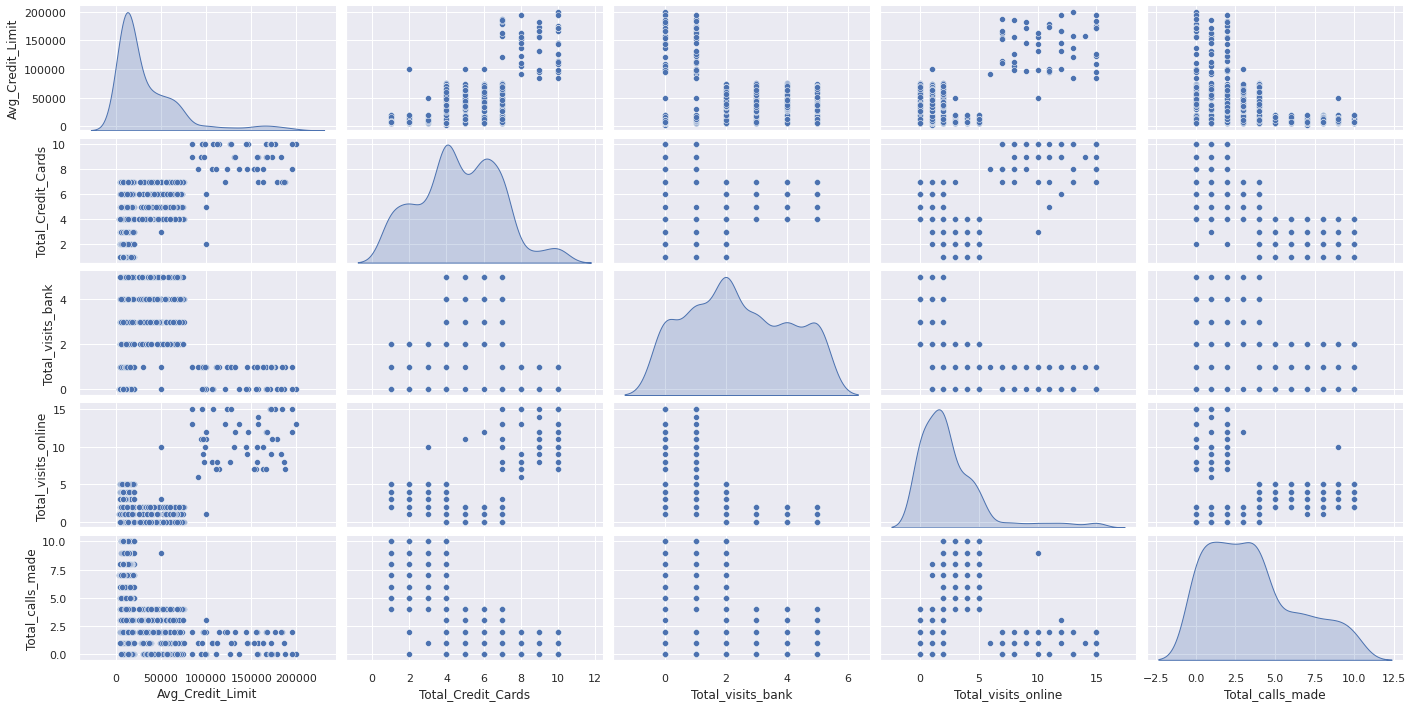

In [142]:
#importing seaborn for statistical plots
sns.pairplot(df, height=2,aspect=2 , diag_kind='kde')

Based on the distribution we can see a general 6-7 clusters based on Average credit limit.
Though in this 


Checking outliers

In [143]:
corr_cols=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online',
       'Total_calls_made']

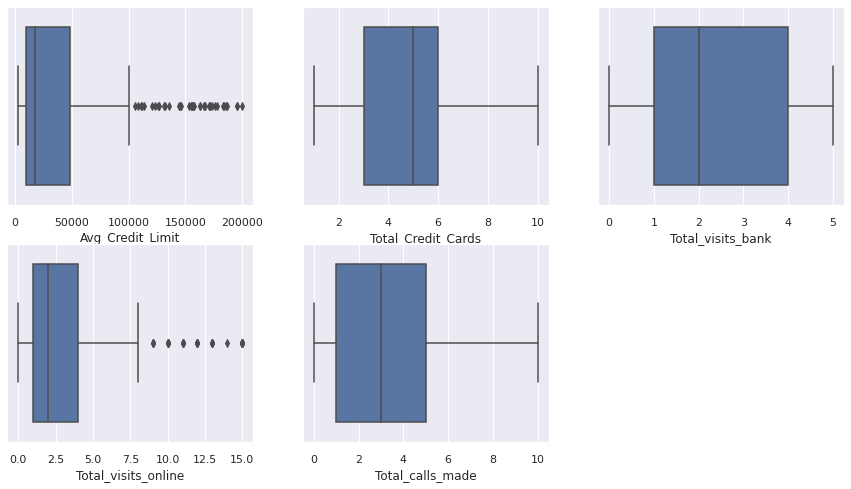

In [144]:
#--Checking Outliers

#-----------------------------Plot Outliers using Box plot------------------------------------
plt.figure(figsize=(15,8))
pos = 1
for i in corr_cols:
    plt.subplot(2, 3, pos)
    sns.boxplot(df[i])
    pos += 1

Average income has outliers for more than 100,000 USD. This is not an outlier, but could be a genuine income.

Also there are some people who visit onlint banking many times. This also may not be an outlier. 



So, both the Ave_credit limit : has lot of outliers. though that could be a real value, we still have to perform outlier treatment as we need to fit in K means.


**Removing Outliers**

In [145]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [146]:
df = treat_outliers(df,'Avg_Credit_Limit')

df = treat_outliers(df,'Total_visits_online')

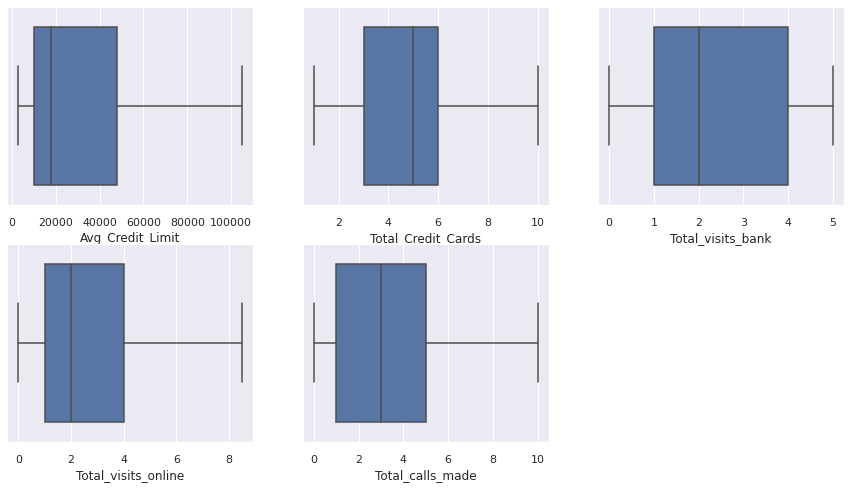

In [147]:
plt.figure(figsize=(15,8))
pos = 1
for i in corr_cols:
    plt.subplot(2, 3, pos)
    sns.boxplot(df[i])
    pos += 1

ALl outliers are now treated

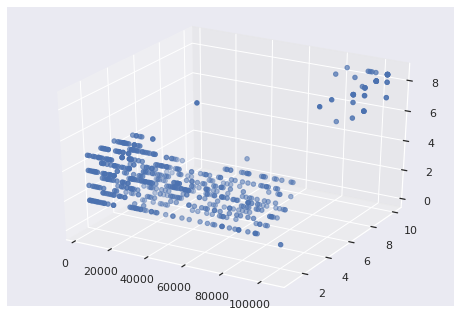

In [148]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Avg_Credit_Limit'], df['Total_Credit_Cards'], df['Total_visits_online'])

In [149]:
##Scale the data
from scipy.stats import zscore

mydata_z = df[corr_cols].apply(zscore)

mydata_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


In [150]:
# List to store cluster and intra cluster distance

clusters = []
inertia_vals = [] #Variance - Intra cluster sum of distance ; within cluster sum of distance

# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 21, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(mydata_z)

    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

In [92]:
print(inertia_vals)

[3300.000000000001, 2040.9898164784945, 933.0437490000536, 780.7736895551766, 704.4759188657507, 642.1490713311521, 600.0486684856997, 564.7034825889484, 539.6166797851888, 511.3540147357803, 490.21015216992294, 468.0926869132169, 446.0168909289058, 429.6850168212106, 414.3992022746661, 395.93313994770267, 382.87078738125393, 372.7825142622026, 349.9980301573428, 338.5425823491244]


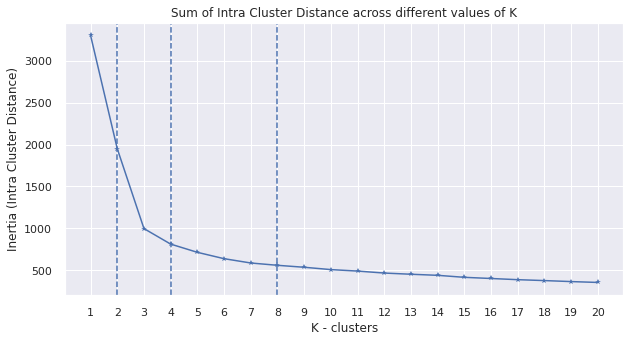

In [151]:
# plot the inertia vs K values

# from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(10,5))
plt.plot(range(1,21,1),inertia_vals,marker='*')
plt.title("Sum of Intra Cluster Distance across different values of K")
plt.axvline(2, linestyle="--")
plt.axvline(4, linestyle="--")
plt.axvline(8, linestyle="--")
plt.xlabel("K - clusters")
plt.ylabel("Inertia (Intra Cluster Distance)")

plt.xticks(range(1,21,1))

plt.show()

Not always an elbow plot, gives a clear indication of a good value of K. From the graph above the Elbow can lie somewhere between 2 to 8. Hence in order to select a appropriate cluster we follow it up with a Silhouette Score as well.

Silhouette Score

𝑆(𝑖)=𝑏(𝑖)−𝑎(𝑖)max{𝑎(𝑖),𝑏(𝑖)} 


a= average intra-cluster distance i.e the average distance between each point within a cluster.
b= average inter-cluster distance i.e the average distance between all clusters.
1 indicates tight , well separated clusters, 0 indicates clusters not well separable and -1 indicates data points of a cluster is more closer to centroid of other clusters than centroid of its own clusters

In [152]:
from sklearn.metrics import silhouette_score

silhouette=[]

for i in range(1,20,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(mydata_z, clusters[i].predict(mydata_z)))
    silhouette.append(round(silhouette_score(mydata_z, clusters[i].predict(mydata_z)),3))

---------------------------------------
KMeans(n_clusters=2, random_state=7)
Silhouette score: 0.4201583924929177
---------------------------------------
KMeans(n_clusters=3, random_state=7)
Silhouette score: 0.5169867470092899
---------------------------------------
KMeans(n_clusters=4, random_state=7)
Silhouette score: 0.38147048130671246
---------------------------------------
KMeans(n_clusters=5, random_state=7)
Silhouette score: 0.35308572097998076
---------------------------------------
KMeans(n_clusters=6, random_state=7)
Silhouette score: 0.2714348469546935
---------------------------------------
KMeans(n_clusters=7, random_state=7)
Silhouette score: 0.26714886501583696
---------------------------------------
KMeans(random_state=7)
Silhouette score: 0.2559645178889122
---------------------------------------
KMeans(n_clusters=9, random_state=7)
Silhouette score: 0.24001674521516797
---------------------------------------
KMeans(n_clusters=10, random_state=7)
Silhouette score: 0.

We see that for 3 clusters we see a well separated data points and high Silhoutte score

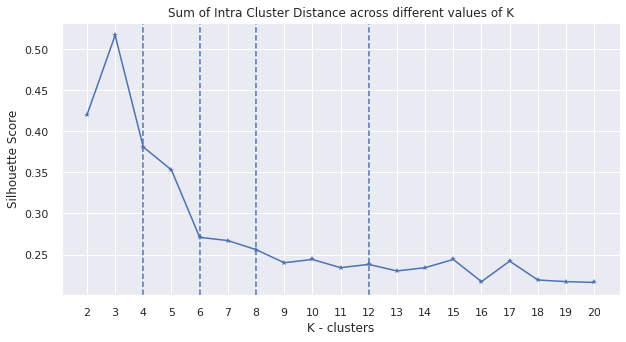

In [153]:
plt.figure(figsize=(10,5))
plt.plot(range(2,21,1),silhouette,marker='*')
plt.title("Sum of Intra Cluster Distance across different values of K")
plt.axvline(4, linestyle="--")
plt.axvline(6, linestyle="--")

plt.axvline(8, linestyle="--")
plt.axvline(12, linestyle="--")
plt.xlabel("K - clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2,21,1))
plt.show()

We acn see that there is a great drop between 3-4. THen with 8 seems to be ideal the elbow changes. It is better to focus on 4 or 8 to send the campaign. 

# **Silhouette Visualizer**

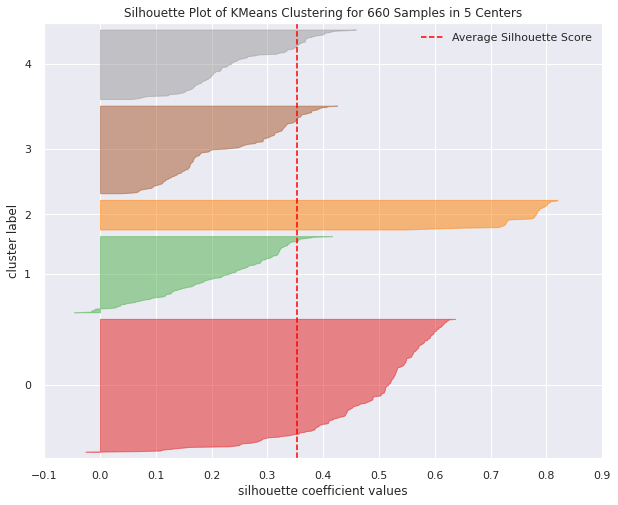

In [159]:
plt.figure(figsize=(10,8));

visualizer = SilhouetteVisualizer(KMeans(5, random_state=7)); # since 7 clusters had more silhoutte score

visualizer.fit(mydata_z);

visualizer.show();

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visually evaluating the density and separation between clusters. 
p.s: The score is calculated by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between -1 and +1, where scores near +1 indicate high separation and scores near -1 indicate that the samples may have been assigned to the wrong cluster.

Average Silhoutte score across all clusters is about 0.38 (between 0.3 and 0.4)-shown as vertical dotted line.

Cluster label 0 has the wider silhoutte forllowed by 3 and then cluster number 1.



# **Inter_clustal difference**

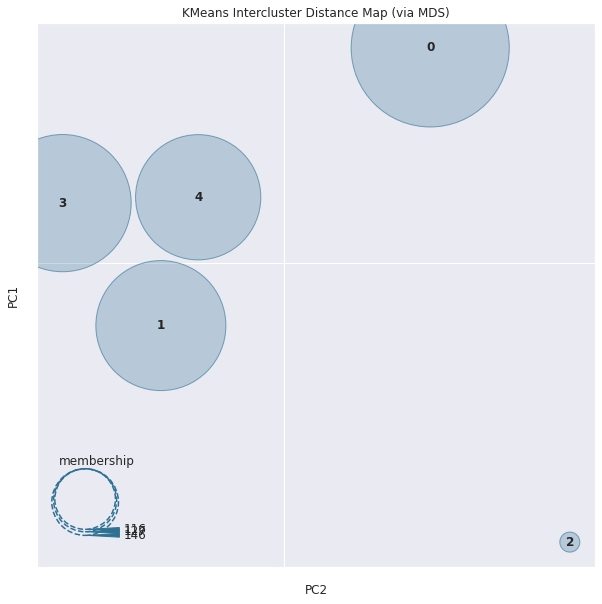

In [217]:
from yellowbrick.cluster import InterclusterDistance

plt.figure(figsize=(10,10));

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=7);

visualizer = InterclusterDistance(model, random_state=7);

visualizer.fit(mydata_z);# Fit the data to the visualizer

visualizer.show()   ;     # Finalize and render the figure

With K= 5 clusters we get a well seperated clusters. CLuster 2 has very minimum customers. Cluster 0 is very much sperated from all the other clusters. 
More the radius of the cluster are more number of people.


Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. In our case the clusters are pretty well seperated
In the above case, cluster 1,3 and 4 are closely realted so we would assume the features of cluster 1, 3 and 4 are close. THis means the the customers have overlapping attributes.

 While cluster 0 has no overlap but is slightly closer to 1,3, and 4 than 2.
 
 

**Studying 3 clusters**

In [161]:


#Set the value of k=5
kmeans = KMeans(n_clusters=3, random_state=7)

kmeans.fit(mydata_z)


KMeans(n_clusters=3, random_state=7)

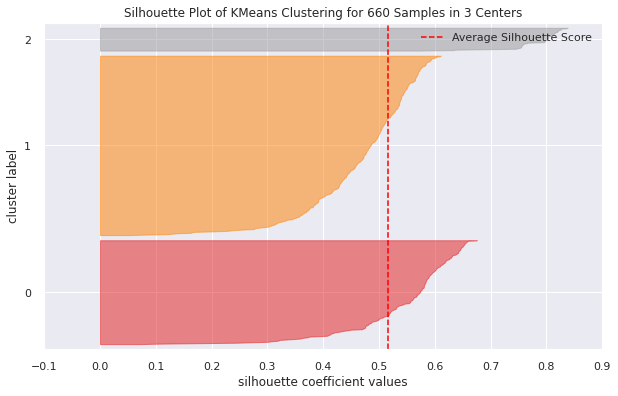

In [162]:
plt.figure(figsize=(10,6));

visualizer = SilhouetteVisualizer(KMeans(3, random_state=7))

visualizer.fit(mydata_z)

visualizer.show()

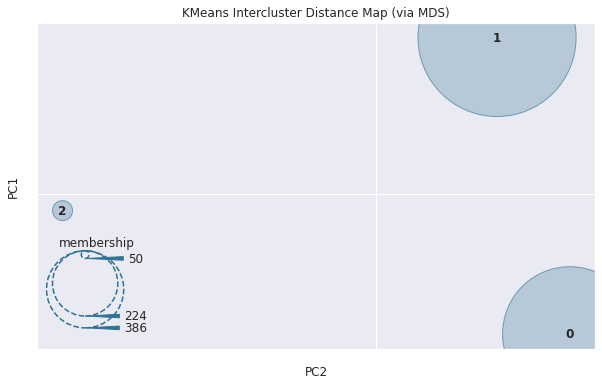

In [163]:
from yellowbrick.cluster import InterclusterDistance

plt.figure(figsize=(10,6));

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=7);

visualizer = InterclusterDistance(model, random_state=7);

visualizer.fit(mydata_z);# Fit the data to the visualizer

visualizer.show()   ;     # Finalize and render the figure

Data points are well seperated here. Targeting might be easier as there is well differentiated clusters to tailor for each customer segment. 
Majority of the customers are in cluster 1, followed by 0 and then 2.
Cluster 2 has very few customers.

In [218]:
## creating a new dataframe only for labels and converting it into categorical variable

#Set the value of k=5
kmeans = KMeans(n_clusters=5, random_state=7)

kmeans.fit(mydata_z)

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

df_labels.head()
df.head()
# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)

df_labeled['labels'].value_counts()

0    221
3    146
1    127
4    116
2     50
Name: labels, dtype: int64

As seen above:
Cluster 0 has max no of members at 221. 
CLuster 3 has 146 members, followed by cluster 1 with 127 members, then 4 with 116 members.

In [166]:
df_labeled.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'labels'],
      dtype='object')

In [167]:
df_labeled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000.0,2,1,1.0,0,5
1,50000.0,3,0,8.5,9,2
2,50000.0,7,1,3.0,4,3
3,30000.0,5,1,1.0,4,3
4,100000.0,6,0,8.5,3,1


In [168]:
## creating a new dataframe only for labels and converting it into categorical variable

#Set the value of k=5
kmeans = KMeans(n_clusters=3, random_state=7)

kmeans.fit(mydata_z)

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)

df_labeled['labels'].value_counts()

1    386
0    224
2     50
Name: labels, dtype: int64

Cluster 1 has 386 members, followed by cluster 0 with 224 members and then cluster 2 with 50 members

In [169]:
mydata_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


In [170]:
df_labeled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000.0,2,1,1.0,0,1
1,50000.0,3,0,8.5,9,0
2,50000.0,7,1,3.0,4,1
3,30000.0,5,1,1.0,4,1
4,100000.0,6,0,8.5,3,2


In [221]:
model = KMeans(n_clusters=3, random_state=7)
model.fit(mydata_z)
df_labeled['KM labels'] = model.labels_
df_labeled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels,KM labels
0,100000.0,2,1,1.0,0,1,1
1,50000.0,3,0,8.5,9,0,0
2,50000.0,7,1,3.0,4,1,1
3,30000.0,5,1,1.0,4,4,1
4,100000.0,6,0,8.5,3,2,2


In [222]:
def cluster_map_KM(val):
    
    if val==1:
        
        return 'Tier 1 - Customers'
    
    elif val==2:
        
        return 'Tier 2 - Customers'
    
    elif val==0:
        
        return 'Tier 3 - Customers'

In [224]:
df_labeled['Group KM']=df_labeled['KM labels'].apply(cluster_map_KM)

pd.set_option('display.max_colwidth', None)

df_labeled.groupby("Group KM").mean().round(2).reset_index().sort_values(by=["Avg_Credit_Limit"], ascending=False)

,Group KM,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM labels
1,Tier 2 - Customers,102660.00,8.74,0.60,8.18,1.08,2.0
0,Tier 1 - Customers,33782.38,5.52,3.49,0.98,2.00,1.0
2,Tier 3 - Customers,12174.11,2.41,0.93,3.55,6.87,0.0


In [225]:
pd.crosstab(df_labeled['Group KM'], df_labeled['Group KM'])

Group KM,Tier 1 - Customers,Tier 2 - Customers,Tier 3 - Customers
Group KM,,,
Tier 1 - Customers,386,0,0
Tier 2 - Customers,0,50,0
Tier 3 - Customers,0,0,224


As a result of K -means clustering we arrived at 3 tiers of customers.

Tier3 customers are 224 cusotmers. They have average credit limit of 12,200 with 2-3 credit cards , and visit bank less than once, and visit online 3-4 times. The total calls these people make are 6-7.

Tier 1 customers are maximum number of 386.  They have the average credit limit of 34,000 with 5-6 credit cards, and make less than 1 online visits, and how ever visit bank 3-4 times. THey make about 2 calls.

Tier 2 customers are about 50 customers, with about 103000 Average. credit limit.
THey have hihg number of credit cards (about 8-9) , htey hardly visit the bank (less than once) but online visits are between 8-9 visitsm with about one call. 


# **Hierarchical Clustering**

In [172]:
# mydata_z.head()
subset_scaled_df=mydata_z.copy()

subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


In [173]:
# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [174]:
# list of distance metrics
distance_metrics = ["euclidean", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    
    print("-"*50)
    
    for lm in linkage_methods:
        
        #-------------------Default is Euclidean Distance for Linkage
        
        Z = linkage(subset_scaled_df, metric=dm, method=lm) #where we calulcate the dendrogram using the linkage
        
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, round(c,3)
            )
        )
        
#         print(coph_dists)
        
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

--------------------------------------------------
Cophenetic correlation for Euclidean distance and single linkage is 0.667.
Cophenetic correlation for Euclidean distance and complete linkage is 0.821.
Cophenetic correlation for Euclidean distance and average linkage is 0.893.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.887.
--------------------------------------------------
Cophenetic correlation for Mahalanobis distance and single linkage is 0.658.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.388.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8.
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.622.
--------------------------------------------------
Cophenetic correlation for Cityblock distance and single linkage is 0.671.
Cophenetic correlation for Cityblock distance and complete linkage is 0.837.
Cophenetic correlation for Cityblock distance and average linkage is 0.891.
Cop

In [175]:
print(high_dm_lm)

['euclidean', 'average']


So we came with Euclidean and average to give highest cophenetic coeff.

# **Dendrogram**

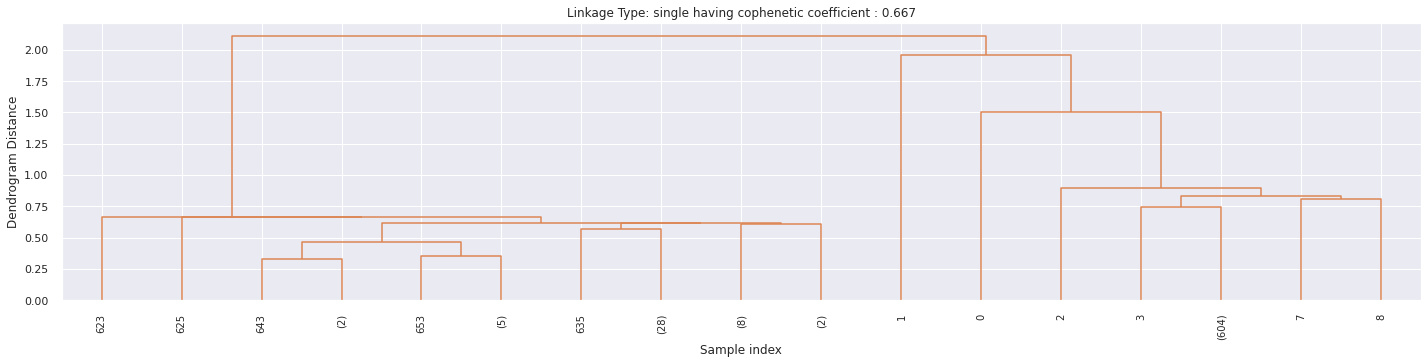

single 0.6666982080229052


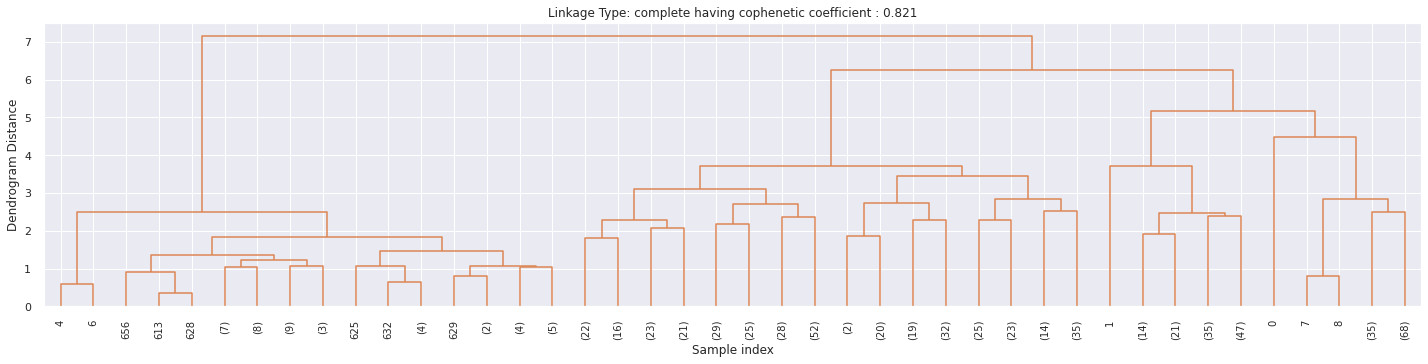

complete 0.8207884321476555


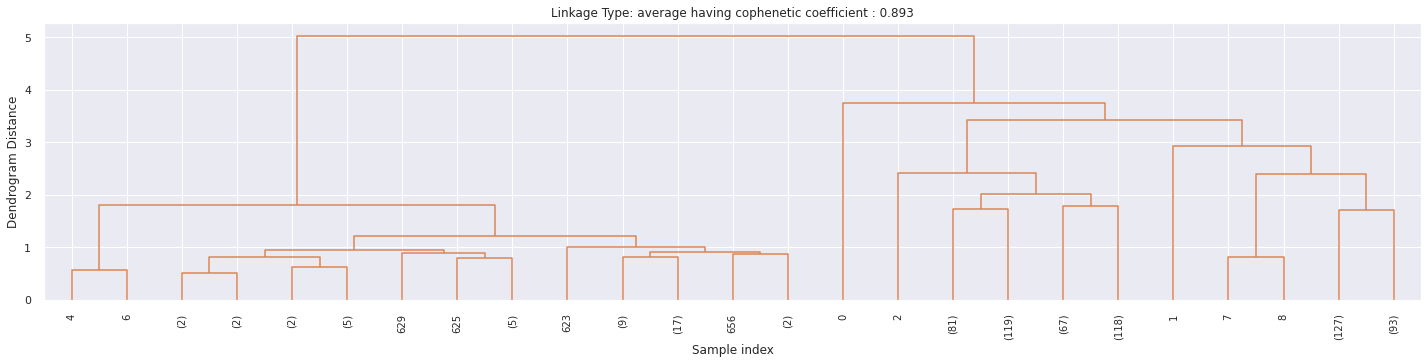

average 0.8926672966587861


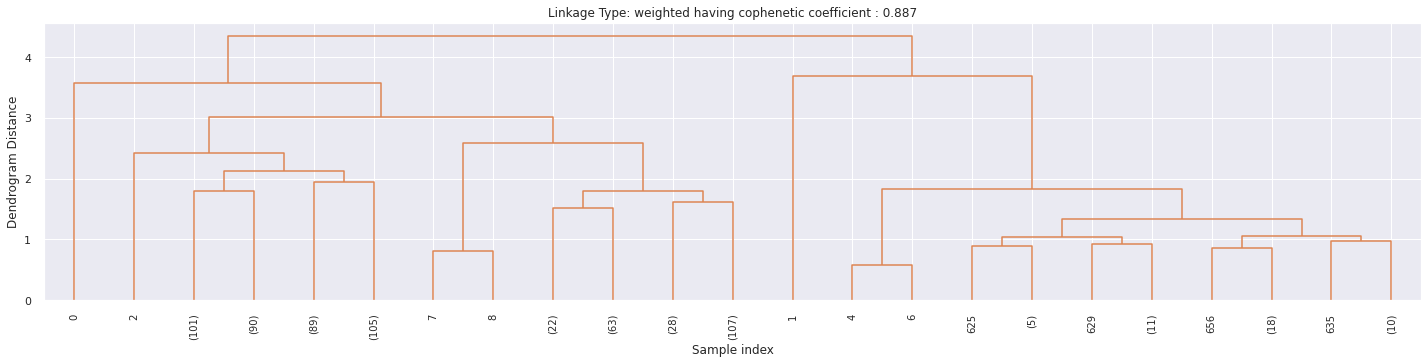

weighted 0.8872365340578665


In [176]:
linkage_methods=['single','complete','average','weighted']

results_cophenetic_coef=[]

for i in linkage_methods:
    
    plt.figure(figsize=(20, 5))
    
    plt.xlabel('Sample index')
    plt.ylabel('Dendrogram Distance')
    
#      Z = linkage(subset_scaled_df, metric='chebyshev', method=lm)
    
    Z = linkage(subset_scaled_df, i) #-------------------Default is Euclidean
    
    cc,cophn_dist=cophenet(Z,pdist(subset_scaled_df))
    
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level',color_threshold=60)
    
    #Z - is the linkage matrix
    #leaf_rotation - Angle of leaf labels. Check how data is displayed in the x axis in the image below
    #p - No more than p levels of the dendrogram tree are displayed. 
    #A “level” includes all nodes with p merges from the last merge.
    
    
    plt.tight_layout()
    
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [114]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,weighted,0.886175


For weighted we got the hihgest cophenetic co-eff, the dendrogram is more fatithful to data.


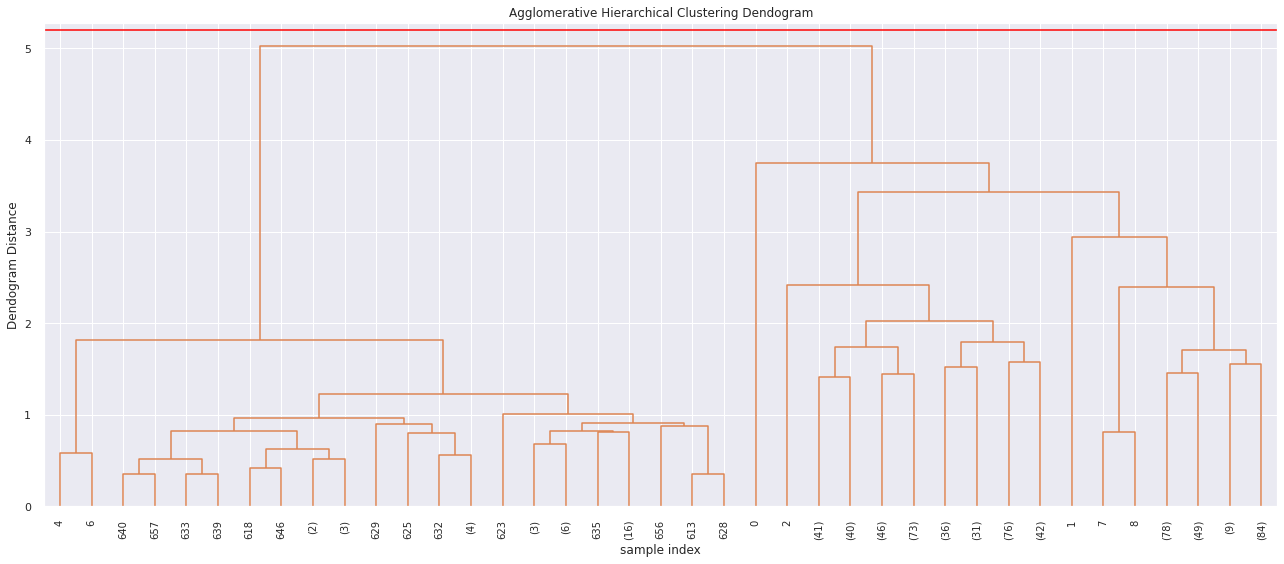

In [181]:
#--------------We have identified the linkage and distance metric as euclidean and average

#---------------Create dendrogram using the linkage(scaled data, distance metric, linkage method)

Z = linkage(subset_scaled_df, metric='euclidean', method='average')

plt.figure(figsize=(18, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Dendogram Distance')

dendrogram(Z,leaf_rotation=90.0, p=6, leaf_font_size=10, truncate_mode='level', color_threshold=5.2)

#----Z: dendrogram, leaf_rotation=formation of the leaves, X axis labels
#---p: How many levels for clustering from the top do you want to see
#---: color threshold: at what dendrogram distance do you want to cut the tree

plt.axhline(y=5.2,color='red')

plt.tight_layout()

At the threshold of 3.5 we were able to get optimal number of clusters and include all the data with p=6.

# **Silhouette Score for Hierarchical Clustering**

In [182]:
df_cop=subset_scaled_df.copy()

df_cop.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


In [183]:
sil_score=[]

for i in range(2,21):
    
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='average')
    
    model.fit(df_cop)
    
    df_cop['labels'] = model.labels_
    
    print("-"*50)
    
    sc=round(silhouette_score(subset_scaled_df, df_cop['labels']),3)
    
    sil_score.append(sc)
    
    print("Silhouette Score for K=",i,":",round(silhouette_score(subset_scaled_df, df_cop['labels']),3))

--------------------------------------------------
Silhouette Score for K= 2 : 0.517
--------------------------------------------------
Silhouette Score for K= 3 : 0.344
--------------------------------------------------
Silhouette Score for K= 4 : 0.481
--------------------------------------------------
Silhouette Score for K= 5 : 0.445
--------------------------------------------------
Silhouette Score for K= 6 : 0.318
--------------------------------------------------
Silhouette Score for K= 7 : 0.268
--------------------------------------------------
Silhouette Score for K= 8 : 0.252
--------------------------------------------------
Silhouette Score for K= 9 : 0.233
--------------------------------------------------
Silhouette Score for K= 10 : 0.226
--------------------------------------------------
Silhouette Score for K= 11 : 0.23
--------------------------------------------------
Silhouette Score for K= 12 : 0.195
--------------------------------------------------
Silhouette S

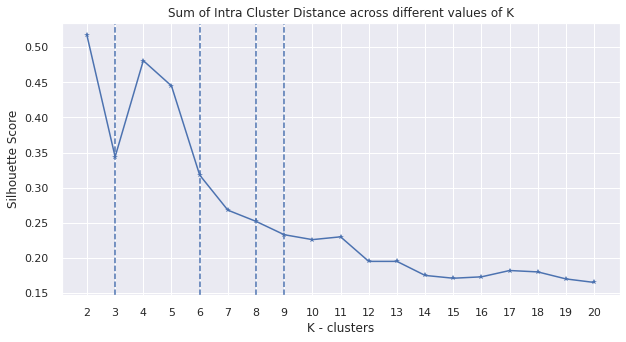

In [184]:
plt.figure(figsize=(10,5))
plt.plot(range(2,21,1),sil_score,marker='*')
plt.title("Sum of Intra Cluster Distance across different values of K")
plt.axvline(3, linestyle="--")
plt.axvline(6, linestyle="--")

plt.axvline(8, linestyle="--")
plt.axvline(9, linestyle="--")
plt.xlabel("K - clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2,21,1))
plt.show()

Optimal number of clusters are at 4 , max is at 7

In [185]:
#--------------------Davies Bouldin score for hierarchical models-------------------------

from sklearn.metrics import davies_bouldin_score

def get_Hmeans_score(
    data, distance, link, center
):  #--------------------- We can specify linkage and distance
    """
    returns the  score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        distance - the distance for AgglomerativeClustering
        link - the linkage method for AgglomerativeClustering
        center - the number of clusters you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the Hierarchical model fit to the data
    """
    #---------------instantiate Hierarchical Clustering
    
    hmeans = AgglomerativeClustering(n_clusters=center, affinity=distance, linkage=link)
    
    #---------------Then fit the model to the data using the fit method
    model = hmeans.fit_predict(subset_scaled_df)

    #---------------Calculate Davies Bouldin score
    score = davies_bouldin_score(subset_scaled_df, model)

    return score

### Davies Bouldin Score

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of between to within cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

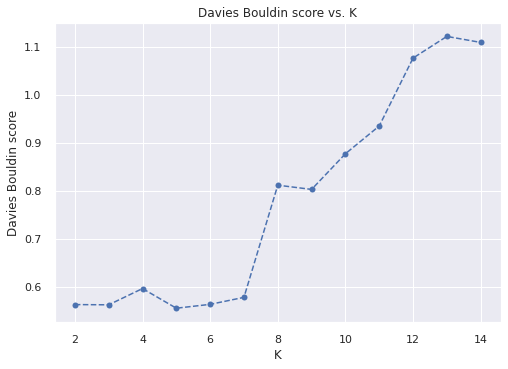

In [186]:
centers = list(range(2, 15)) #These are number of clusters
avg_scores = []

for center in centers:
    avg_scores.append(get_Hmeans_score(subset_scaled_df, "euclidean", "average", center))

plt.plot(centers, avg_scores, linestyle="--", marker="o", color="b");
plt.xlabel("K");
plt.ylabel("Davies Bouldin score");
plt.title("Davies Bouldin score vs. K");

maximum drop between 2-4, and 4-5. We will anchor at 3. 

In [187]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(df_cop)
df_labeled['HC labels'] = model.labels_


In [196]:
#df_cop.head()
df_labeled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels,HC labels,Group HC
0,100000.0,2,1,1.0,0,1,1,Tier 1 - Customers
1,50000.0,3,0,8.5,9,0,1,Tier 1 - Customers
2,50000.0,7,1,3.0,4,1,2,Tier 2 - Customers
3,30000.0,5,1,1.0,4,1,0,Tier 3 - Customers
4,100000.0,6,0,8.5,3,2,1,Tier 1 - Customers


In [189]:
df_labeled['HC labels'] = model.labels_
df_labeled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels,HC labels
0,100000.0,2,1,1.0,0,1,1
1,50000.0,3,0,8.5,9,0,1
2,50000.0,7,1,3.0,4,1,2
3,30000.0,5,1,1.0,4,1,0
4,100000.0,6,0,8.5,3,2,1


In [192]:
##We consider - Fees, Teaching as Quality and Placement and Internship as Outcome

def cluster_map_HC(val):
    
    if val==1:
        
        return 'Tier 1 - Customers'
    
    elif val==2:
        
        return 'Tier 2 - Customers'
    
    elif val==0:
        
        return 'Tier 3 - Customers'

In [197]:
df_labeled['Group HC1']=df_labeled['HC labels'].apply(cluster_map_HC)

pd.set_option('display.max_colwidth', None)

df_labeled.groupby("Group HC1").mean().round(2).reset_index().sort_values(by=["Avg_Credit_Limit"], ascending=False)

,Group HC1,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC labels
0,Tier 1 - Customers,101596.15,8.50,0.60,8.05,1.21,1.0
2,Tier 3 - Customers,27678.65,4.73,2.88,1.48,3.36,0.0
1,Tier 2 - Customers,18703.70,3.17,1.42,3.45,5.27,2.0


In [200]:
pd.crosstab(df_labeled['Group HC1'], df_labeled['Group HC'])

Group HC,Tier 1 - Customers,Tier 2 - Customers,Tier 3 - Customers
Group HC1,,,
Tier 1 - Customers,52,0,0
Tier 2 - Customers,0,135,0
Tier 3 - Customers,0,0,473


So about 473 customers are in Tier 3 for whom the campaigns can be adressed.
THese customers has an average credit limit of about 27700, with about 5 credit cards, and visit the bank thrice, with about less than 2 visits online and make about 3-4 phone calls. 


Tier 2 customers are those whose average cedit limit is about 19000, with about 3-4 credit cards, visit the bank 1-2 times, with online visitis about 3-4 and total custoemr calls made range between 5-6 calls.

Tier 1 customers are the customers with Avg_credit_limit of about 102000 carry about 8-9 credit cards, with less than 1 visit to the back, but do online banking services of about 8, with total phone calls being 1-2 calls.

So, the maximum reach is to Tier 3 customers (about 473), so the campaign should focus on reaching the customers OTHER than online.
Howeve, Tier 1 and Tier 2 customers (about 187) can be reached via online Ads too in the website.